# **<center>Fundamentos de Ciência de Dados e Inteligência de Negócios</center>**

Unimar, Marilia-SP

**Larissa e Luiz Fernando**


Fazer:
problema: Consultoria para compradores de aviões

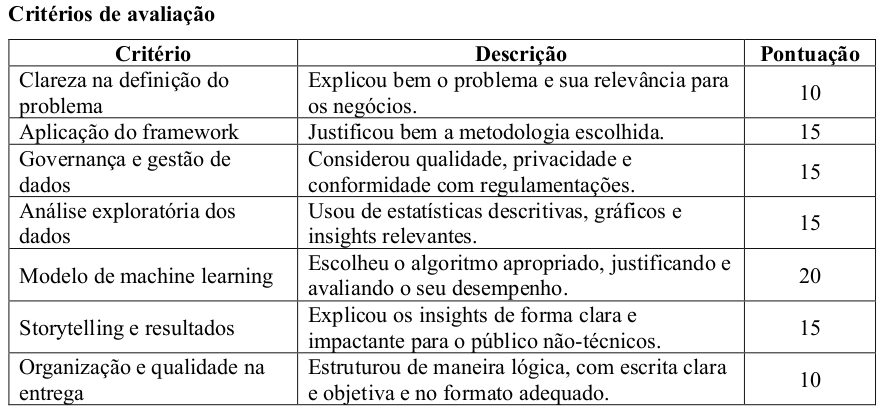

fontes para storytelling:

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

https://medium.com/data-hackers/matplotlib-e-storytelling-com-dados-pt-ii-35e0da269a1e


🎲 **COLETA DE DADOS**



In [1]:
import kagglehub

path = kagglehub.dataset_download("asinow/airplane-price-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/larissa/.cache/kagglehub/datasets/asinow/airplane-price-dataset/versions/1


In [2]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


📜 **LER DADOS**

In [3]:
file = os.listdir(path)

csv = [f for f in file if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv))
df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


**PROCESSAMENTO DE DADOS**

O processamento de dados é importante para que análise dos dados tenha mais fluidez e acertividade no momento da empresa analisar os dados. Logo, limpar, transformar e preparar os dados para análise é totalmente bem vindo, se necessário, assim muitasvezes tornamosdados confusos em dados que nos permitem utiliza-los e criar insights significativos.

👁️‍🗨️ **ANALISE**

In [4]:
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


In [5]:
df.isna().sum()

Model                         0
Üretim Yılı                   0
Motor Sayısı                  0
Motor Türü                    0
Kapasite                      0
Menzil (km)                   0
Yakıt Tüketimi (L/saat)       0
Saatlik Bakım Maliyeti ($)    0
Yaş                           0
Satış Bölgesi                 0
Fiyat ($)                     0
dtype: int64

💊 **TRATAMENTO DE DADOS**

In [6]:
df.rename(columns={'Model':'modelo',
                   'Üretim Yılı':'ano_fabricacao',
                   'Motor Sayısı':'qtde_motores',
                   'Motor Türü':'tipo_motor',
                   'Kapasite':'capacidade',
                   'Menzil (km)':'faixa_km',
                   'Yakıt Tüketimi (L/saat)':'consumo_combutivel_por_hora',
                   'Saatlik Bakım Maliyeti ($)': 'custo_manutencao_por_horar',
                   'Yaş':'idade',
                   'Satış Bölgesi':'regiao_venda',
                   'Fiyat ($)':'preco'},inplace=True)

In [7]:
df.columns

Index(['modelo', 'ano_fabricacao', 'qtde_motores', 'tipo_motor', 'capacidade',
       'faixa_km', 'consumo_combutivel_por_hora', 'custo_manutencao_por_horar',
       'idade', 'regiao_venda', 'preco'],
      dtype='object')

In [8]:
df["ano_fabricacao"].value_counts(normalize=True)
df["modelo"].value_counts().sort_index().head()

modelo
Airbus A320          2048
Airbus A350          2107
Boeing 737           2121
Boeing 777           2011
Bombardier CRJ200    2051
Name: count, dtype: int64


🔹<font color="#4682B4" size="3">**UNIVARIADA**</font>

Na análise univariada, a empresa decidiu analisar quantas vezes cada **modelo** de avião apareceu no dataset. Sendo coletados os numeros absolutos com `value_counts()`

In [9]:
df["modelo"].value_counts()

modelo
Boeing 737           2121
Airbus A350          2107
Bombardier CRJ200    2051
Airbus A320          2048
Cessna 172           2039
Boeing 777           2011
Name: count, dtype: int64

Em seguida também é possível analisar a proporção chamando o argumento que faz normalização, dividindo cada contagem pelo número de registros, contando quantas vezes cada modelo aparece no dataset, mas de forma mais intuitiva e facilitando a visão de stakeholders, para que entendam melhor no momento em que há a representação de um Storytelling.

In [10]:
df["modelo"].value_counts(normalize=True)

modelo
Boeing 737           0.171366
Airbus A350          0.170235
Bombardier CRJ200    0.165711
Airbus A320          0.165468
Cessna 172           0.164741
Boeing 777           0.162479
Name: proportion, dtype: float64

In [11]:
df["ano_fabricacao"].value_counts().sort_index().head()

ano_fabricacao
1980    271
1981    288
1982    264
1983    265
1984    281
Name: count, dtype: int64

>   <font color="#8B008B" size="5">
Storytelling: Com a representação a seguir é possível notar a quantidade de aviões por modelo, mostrando que temos mais de 2 mil aviões de cada modelo 🛩
</font>


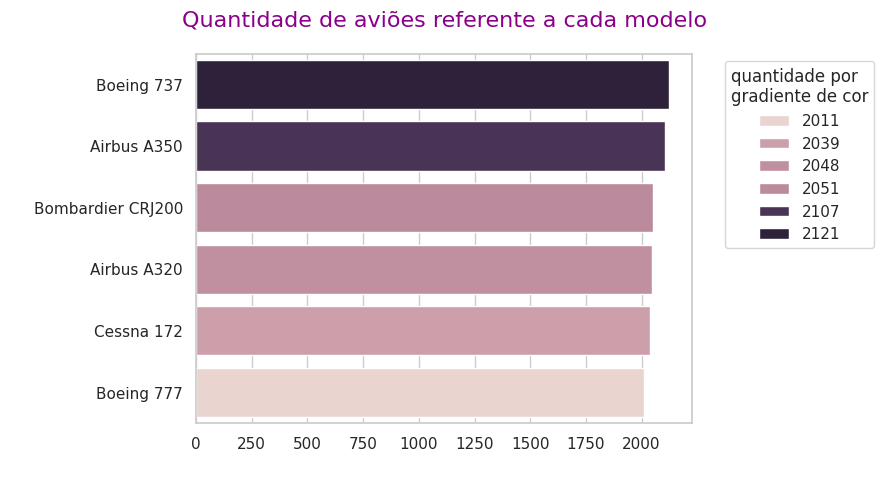

In [12]:
gp=df["modelo"].value_counts()
gp=gp.reset_index()
gp.columns = ["modelo", "quantidade"]
sns.set_theme(style="whitegrid")
plt.title("Quantidade de aviões referente a cada modelo", fontsize=16, color='#8B008B', pad=20)
sns.barplot(data=gp,x="quantidade",y="modelo", hue="quantidade", orient="y")
plt.legend(title="quantidade por \ngradiente de cor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks()
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

>   <font color="#4682B4" size="5">
Storytelling: A representação a seguir é possível notar a quantidade de cada tipo de motor, mostrando que há mais de 10 mil tipos de motores Turbofan 🧑🏼‍🔧
</font>

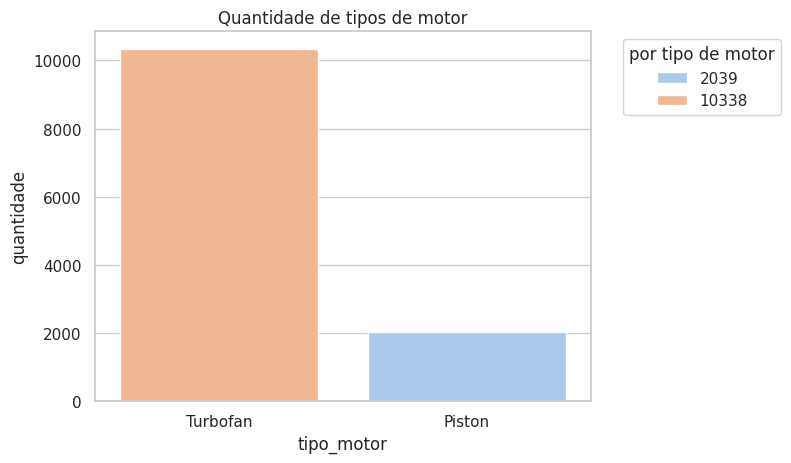

In [13]:
gp = df["tipo_motor"].value_counts()
gp = gp.reset_index()
gp.columns = ["tipo_motor", "quantidade"]

plt.title("Quantidade de tipos de motor")
sns.barplot(data=gp, x="tipo_motor", y="quantidade")
sns.barplot(data=gp,x="tipo_motor",y="quantidade", hue="quantidade", orient="x", palette="pastel")
plt.legend(title="por tipo de motor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Os outliers indicam que há valores bem acima do normal, mas a empresa é ciente de que aeronaves tem categorias e capacidade diferentes, além de outros aspectos, por isso é importante conhecer cada um dos dados, mas pelo que pode ser percebido é fundamental tentar agrupr os modelos e comparar por categoria, para analisar melhor se os dados estão coerentes.

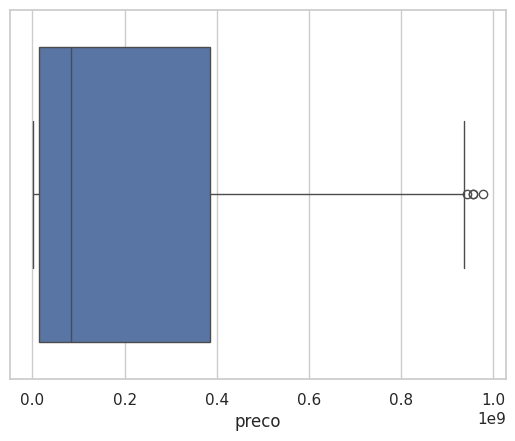

In [14]:
sns.boxplot(x=df['preco'])
plt.show()


🔹🔹<font color="#4682B4" size="3">**BIVARIADA**</font>

Definir a faixa de preços de acordo com modelo pode garantir melhor entendimento entre os valores das aeronaves e assim é mais facil também identificar os preços se são justos entre aeronaves do mesmo modelo e assim poder indicar um preço justo para cada modelo de acordo com a média por exemplo. Assim tambem é possível alertar clientes se o preço está muito elevado, de acordo com o modelo também faendo com que o comprador evite por exemplo uma compra errada sem refencias.

In [15]:
df.groupby("modelo").agg({"preco": ["min", "mean", "median", "max"]})

preco                                          
                            min          mean        median           max
modelo                                                                   
Airbus A320        5.253655e+07  1.015897e+08  9.098483e+07  1.910509e+08
Airbus A350        2.519628e+08  4.815106e+08  4.306827e+08  9.048767e+08
Boeing 737         4.447806e+07  8.154770e+07  7.296603e+07  1.509432e+08
Boeing 777         2.702219e+08  5.134486e+08  4.627188e+08  9.782132e+08
Bombardier CRJ200  8.150222e+06  1.574260e+07  1.398250e+07  3.230731e+07
Cessna 172         1.458148e+05  2.794055e+05  2.514744e+05  5.612793e+05

Apesar de ser feita a analise bivariada com preço e modelo, é importante salientar que pode haver também variação de preços do mesmo modelo de acordo com os anos de fabriaçao das aeronaves, por isso a analise é importante, assim pode ser avaliado se o preço da aeronave em questão, dependendo do ano, foi caindo com o tempo ou não

In [16]:
df.groupby(['modelo', 'ano_fabricacao']).agg({"preco": ["min", "mean", "median", "max"]})

preco                              \
                                    min          mean        median   
modelo      ano_fabricacao                                            
Airbus A320 1980            59832306.58  7.878640e+07  7.935187e+07   
            1981            59047451.24  7.865017e+07  7.898016e+07   
            1982            59961186.45  7.728584e+07  7.713900e+07   
            1983            63442829.48  7.757039e+07  7.774046e+07   
            1984            54221016.52  7.538875e+07  7.537720e+07   
...                                 ...           ...           ...   
Cessna 172  2019              277063.11  3.874909e+05  3.952753e+05   
            2020              332849.80  4.053802e+05  4.074546e+05   
            2021              329040.06  4.015374e+05  4.027003e+05   
            2022              328506.24  4.085617e+05  4.121698e+05   
            2023              358284.42  4.248015e+05  4.136969e+05   

                                         
                                    max  
modelo      ano_fabricacao               
Airbus A320 1980            91647792.99  
            1981            95677466.83  
            1982            92887652.03  
            1983            89665631.07  
            1984            94594364.65  
...                                 ...  
Cessna 172  2019              480455.36  
            2020              470552.07  
            2021              483728.56  
            2022              485073.44  
            2023              561279.30  

[264 rows x 4 columns]

Dependendo do perfil do comprador, sendo ele uma empresa de viagens aereas, ou outras finalidades, é importante saber o preço tambem por capacidade, nao apenas modelo, além do limite de quilometragem, já que algumas empresas oferedcem voos internacionais, nao apenas nacionais.

In [17]:
gp = df.groupby("modelo").agg(max=("capacidade", "max"))
gp.reset_index(inplace=True)
gp

,modelo,max
0,Airbus A320,180
1,Airbus A350,350
2,Boeing 737,162
3,Boeing 777,396
4,Bombardier CRJ200,50
5,Cessna 172,4


In [18]:
gp = df.groupby("modelo").agg(max=("faixa_km", "max"))
gp.reset_index(inplace=True)
gp

,modelo,max
0,Airbus A320,6300
1,Airbus A350,14800
2,Boeing 737,5700
3,Boeing 777,15600
4,Bombardier CRJ200,3000
5,Cessna 172,1285


Os compradores também podem se interessar em aeronaves que tem economia de combustivel e evitar modelos de aeronaves que tem maior consumo, ainda mais se os avioes forem de carga, além disso ajudaria ainda mais o cliente um grafico onde pode ser mostrado o custo de manutenção por hora e consumo de combustivel


In [19]:
gp = df.groupby("modelo").agg({"consumo_combutivel_por_hora": "mean", "custo_manutencao_por_horar": "mean"})
gp.reset_index()
gp


,consumo_combutivel_por_hora,custo_manutencao_por_horar
modelo,,
Airbus A320,8.594028,2798.925820
Airbus A350,8.499117,2714.306830
Boeing 737,8.510207,2744.832909
Boeing 777,8.538996,2707.629766
Bombardier CRJ200,8.439805,2779.267767
Cessna 172,30.122398,2719.588107


In [20]:
print(gp.columns)

Index(['consumo_combutivel_por_hora', 'custo_manutencao_por_horar'], dtype='object')


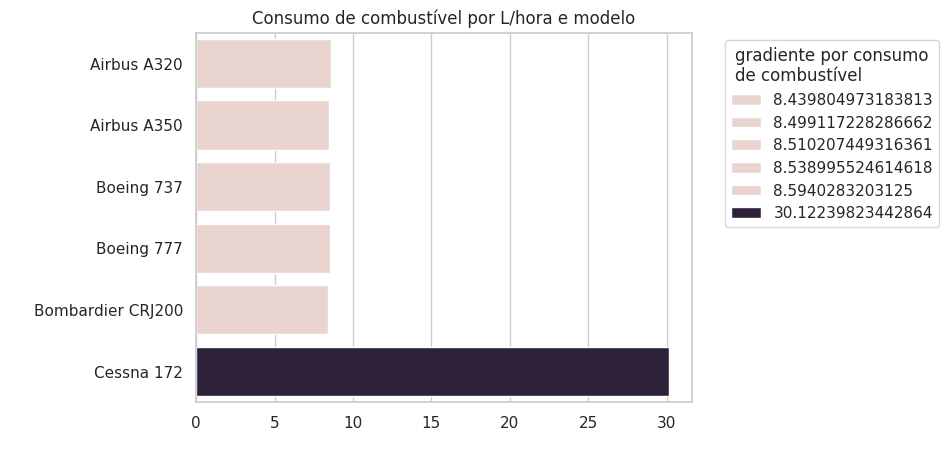

In [21]:
sns.barplot(data=gp, x="consumo_combutivel_por_hora", y="modelo", hue="consumo_combutivel_por_hora")
plt.title("Consumo de combustível por L/hora e modelo")
plt.legend(title="gradiente por consumo\nde combustível", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()


Com a analise de custo de manutenção por hora de acordo com o modelo, a empresa pode perceber qual modelo pode ser indicado para compradores que bucam o custo menor de manutenção.

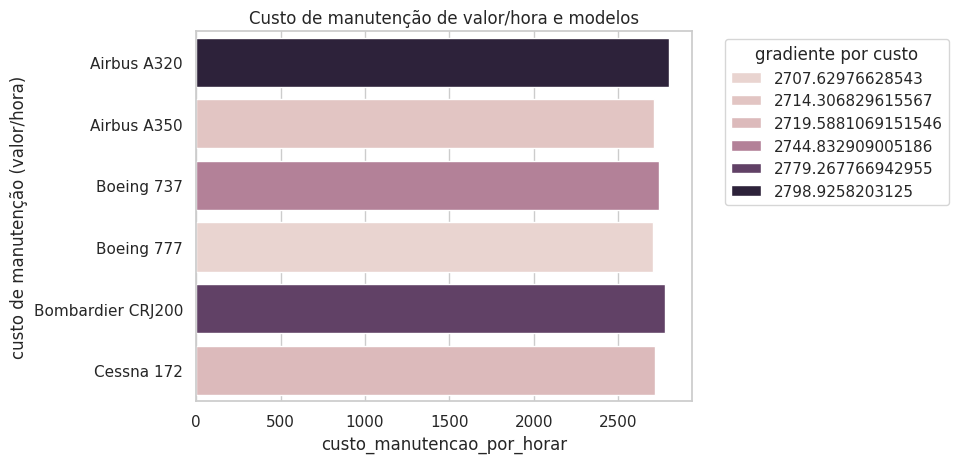

In [22]:
sns.barplot(data=gp, x="custo_manutencao_por_horar", y="modelo", hue="custo_manutencao_por_horar")
plt.title("Custo de manutenção de valor/hora e modelos")
plt.legend(title="gradiente por custo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("custo de manutenção (valor/hora)")
plt.show()

Os boxplots mostram a distribuição dos preços de acordo com cada modelo, por exemplo, compradores que quiserem aeronaves que tem um equilibrio entre estes dois atributos, sendo eles custo e desempenho, podem optar mais pelos modelos Airbus A320 e Boeing 737. Contudo o Airbus 320 além de ser estável entre o consumo e capacidade não demonstrou outliers visiveis, chegando a conclusão que que tambem tem preços mais previsiveis, então isso pode ser uma opção mais segura para stakeholders que buscam mais equilibrio e previsão segura de preços

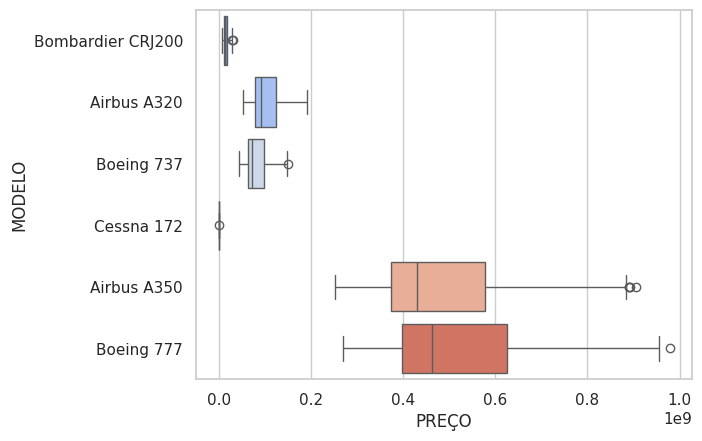

In [23]:
sns.boxplot(df, x='preco', y='modelo', hue="modelo", palette="coolwarm")
plt.xlabel("PREÇO")
plt.ylabel("MODELO")
plt.show()

In [34]:
# calculo do preço médio absoludo para cada modelo a cada ano
gp = df.groupby(["ano_fabricacao", "modelo"]).agg({"preco": "mean"})
gp.reset_index()


,ano_fabricacao,modelo,preco
0,1980,Airbus A320,7.878640e+07
1,1980,Airbus A350,3.700725e+08
2,1980,Boeing 737,6.272068e+07
3,1980,Boeing 777,3.975311e+08
4,1980,Bombardier CRJ200,1.187683e+07
...,...,...,...
259,2023,Airbus A350,7.391922e+08
260,2023,Boeing 737,1.253520e+08
261,2023,Boeing 777,7.931795e+08
262,2023,Bombardier CRJ200,2.454664e+07


Plotando um grafico de linha, é possivel mostrar a evolução do preço dos aviõesao longo dos anos, sendo comparado o ano de fabricação das aeronaves pelo preço médio absoluto de cada modelo/ano

<Axes: xlabel='ano_fabricacao', ylabel='preco'>

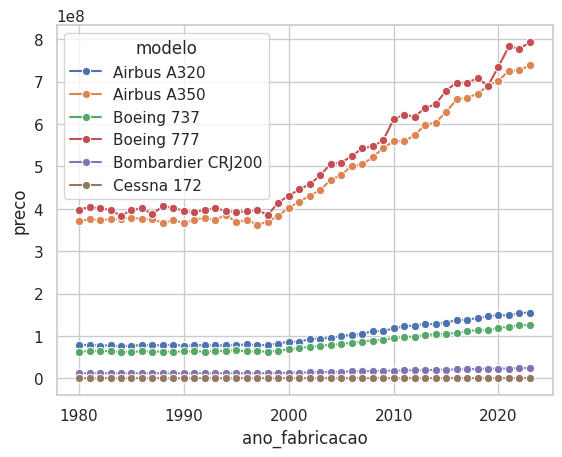

In [36]:

sns.lineplot(data=gp, x="ano_fabricacao", y="preco", hue="modelo", marker="o")

In [37]:
# calculando preço relativo de cada modelo em relação à media de todos as aeronaves por ano
gp_modelo_ano = df.groupby(["ano_fabricacao", "modelo"]).agg(mean=("preco", "mean")) / df.groupby(["ano_fabricacao"]).agg(mean=("preco", "mean"))
gp.reset_index(inplace=True)
gp

,ano_fabricacao,modelo,preco
0,1980,Airbus A320,7.878640e+07
1,1980,Airbus A350,3.700725e+08
2,1980,Boeing 737,6.272068e+07
3,1980,Boeing 777,3.975311e+08
4,1980,Bombardier CRJ200,1.187683e+07
...,...,...,...
259,2023,Airbus A350,7.391922e+08
260,2023,Boeing 737,1.253520e+08
261,2023,Boeing 777,7.931795e+08
262,2023,Bombardier CRJ200,2.454664e+07


In [15]:
# ver plotly para storytelling